<a href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Lab-Identification_Arbres/Id_arbre_reseau_convolutif-transfert_paufinage-colab.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter) 
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables.

# Identification d'arbres à partir de leur écorce
## Réseau convolutif et apprentissage par transfert

##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Apprentissage par transfert et paufinage

In [2]:
import os

In [3]:
# Note that we did not use Acer platanoides (2), Pinus rigida (15) and Populus grandidentata (18)
# since we did not collect enough images in these categories to obtain meaningful results.
data_ecorces = {
    'SAB': 1,  # Pas assez d'espace disque
    'ERB': 2,  # Pas assez de spécimens - seulement 1
    'ERR': 3, 
    'ERS': 4, 
    'BOJ': 5, 
    'BOP': 6,
    'HEG': 7,  # Pas assez d'espace disqe
    'FRA': 8, 
    'MEL': 9,  # Pas assez d'espace disque
    'OSV': 10, # Pas assez d'espace disque
    'EPO': 11,
    'EPB': 12,
    'EPN': 13,
    'EPR': 14,
    'PID': 15, # Pas assez de spécimens - seulement 4
    'PIR': 16, # Pas assez d'espace disque
    'PIB': 17, # Pas assez d'espace disque
    'PEG': 18, # Pas assez de spécimens - seulement 3
    'PET': 19, # Pas assez d'espace disque
    'CHR': 20,
    'THO': 21, # Pas assez d'espace disque
    'PRU': 22, # Pas assez d'espace disque
    'ORA': 23  # Pas assez d'espace disque
}

noms_arbres = {
            1: '\emph{Abies balsamea} - Sapin Baumier - Balsam fir',
            2: '\emph{Acer platanoides} - Érable de Norvège - Norway maple',
            3: '\emph{Acer rubrum} - Érable rouge - Red maple',
            4: '\emph{Acer saccharum} - Érable à sucre - Sugar maple',
            5: '\emph{Betula alleghaniensis} - Bouleau jaune - Yellow birch',
            6: '\emph{Betula papyrifera} - Bouleau à papier - White birch',
            7: '\emph{Fagus grandifolia} - Hêtre à grandes feuilles - American beech',
            8: "\emph{Fraxinus americana} - Frêne d'Amérique - White ash",
            9: '\emph{Larix laricina} - Mélèze - Tamarack',
            10: '\emph{Ostrya virginiana} - Ostryer de Virginie - American hophornbeam',
            11: '\emph{Picea abies} - Épinette de Norvège - Norway spruce',
            12: '\emph{Picea glauca} - Épinette blanche - White spruce',
            13: '\emph{Picea mariana} - Épinette noire - Black spruce',
            14: '\emph{Picea rubens} - Épinette rouge - Red spruce',
            15: '\emph{Pinus rigida} - Pin rigide - Pitch pine',
            16: '\emph{Pinus resinosa} - Pin rouge - Red pine',
            17: '\emph{Pinus strobus} - Pin blanc - Eastern white pine',
            18: '\emph{Populus grandidentata} - Peuplier à grandes dents - Big-tooth aspen',
            19: '\emph{Populus tremuloides} - Peuplier faux tremble - Quaking aspen',
            20: '\emph{Quercus rubra} - Chêne rouge - Northern red oak',
            21: '\emph{Thuja occidentalis} - Thuya occidental - Northern white cedar',
            22: '\emph{Tsuga canadensis} - Pruche du Canada - Eastern Hemlock',
            23: "\emph{Ulmus americana} - Orme d'Amérique - American elm"
        }
print("Code executed")

Code executed


In [4]:
data_zip_urls_dict = {
   "BOJ":"https://drive.google.com/file/d/1d2zxg2pt5S8UJIK-E7IuWfGN0d1kxxMw/view?usp=sharing",
   "BOP":"https://drive.google.com/file/d/12cg6UO4HLnjk5fE_KXtrgdC2s8uGh4Zp/view?usp=sharing",
   "CHR":"https://drive.google.com/file/d/1Nq19-I-Q577KXMTFrkhlJDhMfclh0cWn/view?usp=sharing",
   "EPB":"https://drive.google.com/file/d/1K_Ncw8VEiuDZ_iJDbYToMq-GO5dzKHns/view?usp=sharing",
   "EPN":"https://drive.google.com/file/d/1S309DYmg76SrIA89aVQWXCMwm6CzhN8b/view?usp=sharing",
   "EPO":"https://drive.google.com/file/d/1fTKEcpYgmRg4spUpcH0FAiAnoRgANafL/view?usp=sharing",
   "EPR":"https://drive.google.com/file/d/1qRhtZ8LZjH_45fxetG7swg3ok3znk8CJ/view?usp=sharing",
   "ERB":"https://drive.google.com/file/d/1ighbGniKAT_GrPm4RtsIAuN1STg9sjR9/view?usp=sharing", # Assez de données?
   "ERR":"https://drive.google.com/file/d/1rEo1thMNJTgFeTzTOfI11_FPSqMgbHSL/view?usp=sharing",
   "ERS":"https://drive.google.com/file/d/1ts-t7bOH9DfKj0q0v35nMgKHgVT0ZjyG/view?usp=sharing",
   "FRA":"https://drive.google.com/file/d/1yLacRGW7JtlFWV5asEXHpAToClL38D64/view?usp=sharing",
   "HEG":"https://drive.google.com/file/d/1zoJKEIrsCD1XxglgPJkEygumev1xRQ3U/view?usp=sharing",
   "MEL":"https://drive.google.com/file/d/1Wdy3DDnWfUysXjcIFFq12UFW7tlTYDT2/view?usp=sharing",
   "ORA":"https://drive.google.com/file/d/19_oYwCAaPfP6vMuqUnAzIQAa39Brxhfi/view?usp=sharing",
   "OSV":"https://drive.google.com/file/d/1VJCCZN1iwBK2Nzh_PHC9xvw63xiLuXXI/view?usp=sharing",
   "PEG":"https://drive.google.com/file/d/1YUWH4IaTnmcoIAavZq8HyXByJxO7_zBg/view?usp=sharing", # Assez de données?
   "PET":"https://drive.google.com/file/d/13bMkvr_1mRz1TuOcX8-c-LfTSIsNKrve/view?usp=sharing",
   "PIB":"https://drive.google.com/file/d/13bMkvr_1mRz1TuOcX8-c-LfTSIsNKrve/view?usp=sharing",
   "PID":"https://drive.google.com/file/d/12xswrf4pDmTAcYZDAY9D-0HniLjGJCxp/view?usp=sharing", # Assez de données?
   "PIR":"https://drive.google.com/file/d/1qny4meuoT-HYZ_KTyPQbQnzLhebkgkfU/view?usp=sharing",
   "PRU":"https://drive.google.com/file/d/1xQWHQvIbwRRBoi2F27q22_drUeM8m3S8/view?usp=sharing",
   "SAB":"https://drive.google.com/file/d/1ol2mlYAz5bMfQkwqcnxhCOg4avftYtRe/view?usp=sharing",
   "THO":"https://drive.google.com/file/d/1_mI0saGpfxb4wnhElCzxg0WU4OiFHkfP/view?usp=sharing",
  
}
data_zip_urls_dict

{'BOJ': 'https://drive.google.com/file/d/1d2zxg2pt5S8UJIK-E7IuWfGN0d1kxxMw/view?usp=sharing',
 'BOP': 'https://drive.google.com/file/d/12cg6UO4HLnjk5fE_KXtrgdC2s8uGh4Zp/view?usp=sharing',
 'CHR': 'https://drive.google.com/file/d/1Nq19-I-Q577KXMTFrkhlJDhMfclh0cWn/view?usp=sharing',
 'EPB': 'https://drive.google.com/file/d/1K_Ncw8VEiuDZ_iJDbYToMq-GO5dzKHns/view?usp=sharing',
 'EPN': 'https://drive.google.com/file/d/1S309DYmg76SrIA89aVQWXCMwm6CzhN8b/view?usp=sharing',
 'EPO': 'https://drive.google.com/file/d/1fTKEcpYgmRg4spUpcH0FAiAnoRgANafL/view?usp=sharing',
 'EPR': 'https://drive.google.com/file/d/1qRhtZ8LZjH_45fxetG7swg3ok3znk8CJ/view?usp=sharing',
 'ERB': 'https://drive.google.com/file/d/1ighbGniKAT_GrPm4RtsIAuN1STg9sjR9/view?usp=sharing',
 'ERR': 'https://drive.google.com/file/d/1rEo1thMNJTgFeTzTOfI11_FPSqMgbHSL/view?usp=sharing',
 'ERS': 'https://drive.google.com/file/d/1ts-t7bOH9DfKj0q0v35nMgKHgVT0ZjyG/view?usp=sharing',
 'FRA': 'https://drive.google.com/file/d/1yLacRGW7JtlFWV5asE

In [5]:
# Création des répertoires de données
# Nous allons créer un répertoire de base `src` et des répertoiresnpour les données 
# d'entrainement, de validation et de test pour chaque étiquette cible

try:
    os.mkdir("/tmp/src/")
except OSError:
    pass
try:
    os.mkdir("/tmp/lab_id_arbres/")
except OSError:
    pass


In [7]:
# Référence: https://colab.research.google.com/notebooks/io.ipynb
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import shutil
import zipfile


In [8]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [9]:
nbr_classes = 0
for arbre_id in data_zip_urls_dict.keys():
    url = data_zip_urls_dict[arbre_id]
    id_fichier = url.split('/')[5]
    fichier = drive.CreateFile({'id':id_fichier})
    nom_fichier = arbre_id + ".zip"
    # télécharger le fichier nom_fichier
    fichier.GetContentFile("/tmp/src/" + nom_fichier)
    print("Fichier " + nom_fichier + " téléchargé")
    zip_ref = zipfile.ZipFile("/tmp/src/" + nom_fichier, 'r')
    zip_ref.extractall("/tmp/src")
    zip_ref.close()
    print("Fichier " + nom_fichier + " décompressé")
    try:
        os.remove("/tmp/src/"+nom_fichier)
        print("Fichier " + nom_fichier + " effacé")
    except:
        print("?")
    nbr_classes += 1
shutil.rmtree('/tmp/src/__MACOSX')
print("nbr_classes:",nbr_classes)

Fichier BOJ.zip téléchargé
Fichier BOJ.zip décompressé
Fichier BOJ.zip effacé
Fichier BOP.zip téléchargé
Fichier BOP.zip décompressé
Fichier BOP.zip effacé
Fichier CHR.zip téléchargé
Fichier CHR.zip décompressé
Fichier CHR.zip effacé
Fichier EPB.zip téléchargé
Fichier EPB.zip décompressé
Fichier EPB.zip effacé
Fichier EPN.zip téléchargé
Fichier EPN.zip décompressé
Fichier EPN.zip effacé
Fichier EPO.zip téléchargé
Fichier EPO.zip décompressé
Fichier EPO.zip effacé
Fichier EPR.zip téléchargé
Fichier EPR.zip décompressé
Fichier EPR.zip effacé
Fichier ERB.zip téléchargé
Fichier ERB.zip décompressé
Fichier ERB.zip effacé
Fichier ERR.zip téléchargé
Fichier ERR.zip décompressé
Fichier ERR.zip effacé
Fichier ERS.zip téléchargé
Fichier ERS.zip décompressé
Fichier ERS.zip effacé
Fichier FRA.zip téléchargé
Fichier FRA.zip décompressé
Fichier FRA.zip effacé
Fichier HEG.zip téléchargé
Fichier HEG.zip décompressé
Fichier HEG.zip effacé
Fichier MEL.zip téléchargé
Fichier MEL.zip décompressé
Fichier M

## Répartition des données

In [10]:
!pip3 install split-folders tqdm

In [11]:
# Répartition des données d'entraînement, de validation et de tests
import splitfolders

#### input dataset that want to split
input_folder = "/tmp/src"
output_folder= "/tmp/lab_id_arbres"
# => train, val, test

splitfolders.ratio(input_folder, output= output_folder, seed=42, ratio = (0.95, 0.0, 0.05))

print("Répartition des données terminée!")

Copying files: 3857 files [00:05, 700.15 files/s]


Répartition des données terminée!


### Visualisation d'un échantillon des données

__________________________________________________________________________________________
SAB  Sapin Baumier 
/tmp/lab_id_arbres/train/SAB/994_SAB_85_GalaxyS5_20170622_092523_18.jpg
/tmp/lab_id_arbres/train/SAB/1000_SAB_72_GalaxyS5_20170622_102700_5.jpg
/tmp/lab_id_arbres/train/SAB/988_SAB_74_GalaxyS5_20170622_091314_9.jpg
/tmp/lab_id_arbres/train/SAB/996_SAB_46_GalaxyS5_20170622_092958_14.jpg


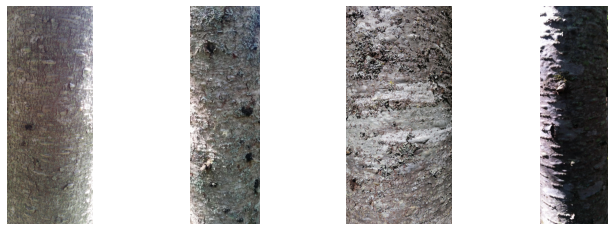

__________________________________________________________________________________________
ERB  Érable de Norvège 
/tmp/lab_id_arbres/train/ERB/541_ERB_70_GalaxyS5_20170607_151651_13.jpg
/tmp/lab_id_arbres/train/ERB/541_ERB_70_GalaxyS5_20170607_151651_12.jpg
/tmp/lab_id_arbres/train/ERB/541_ERB_70_GalaxyS5_20170607_151651_39.jpg


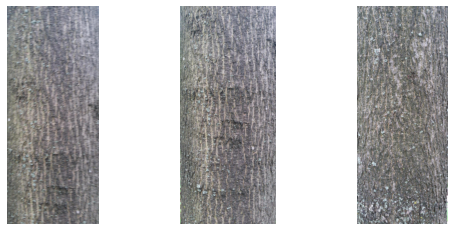

__________________________________________________________________________________________
ERR  Érable rouge 
/tmp/lab_id_arbres/train/ERR/192_ERR_70_Nexus 5_20170804_093023_6.jpg
/tmp/lab_id_arbres/train/ERR/198_ERR_63_Nexus 5_20170804_111458_2.jpg
/tmp/lab_id_arbres/train/ERR/553_ERR_117_GalaxyS7_20170922_125011_4.jpg
/tmp/lab_id_arbres/train/ERR/546_ERR_33_GalaxyS7_20170922_123251_8.jpg


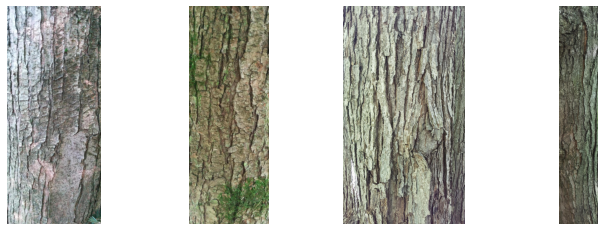

__________________________________________________________________________________________
ERS  Érable à sucre 
/tmp/lab_id_arbres/train/ERS/581_ERS_114_GalaxyS7_20170920_164602_18.jpg
/tmp/lab_id_arbres/train/ERS/771_ERS_88_GalaxyS5_20170615_112622_4.jpg
/tmp/lab_id_arbres/train/ERS/584_ERS_91_GalaxyS7_20170920_165440_12.jpg
/tmp/lab_id_arbres/train/ERS/208_ERS_60_GalaxyS7_20170607_154932_2.jpg


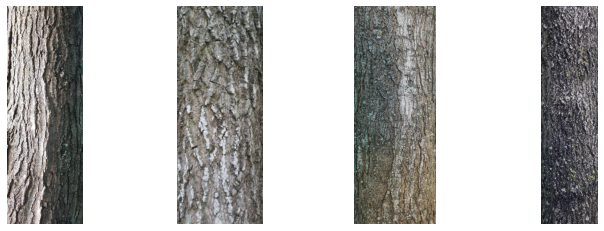

__________________________________________________________________________________________
BOJ  Bouleau jaune 
/tmp/lab_id_arbres/train/BOJ/646_BOJ_73_GalaxyS5_20170615_115156_14.jpg
/tmp/lab_id_arbres/train/BOJ/20_BOJ_120_Nexus 5_20170607_155339_18.jpg
/tmp/lab_id_arbres/train/BOJ/653_BOJ_86_GalaxyS5_20170622_103015_18.jpg
/tmp/lab_id_arbres/train/BOJ/655_BOJ_41_GalaxyS5_20170622_103738_8.jpg


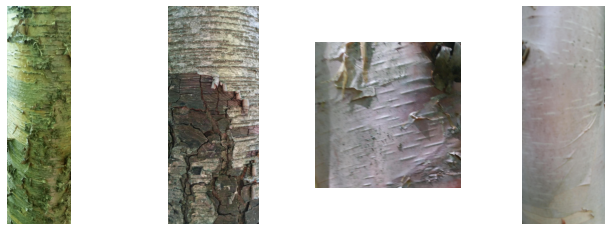

__________________________________________________________________________________________
BOP  Bouleau à papier 
/tmp/lab_id_arbres/train/BOP/38_BOP_66_Nexus 5_20170810_120401_8.jpg
/tmp/lab_id_arbres/train/BOP/33_BOP_89_Nexus 5_20170608_091516_18.jpg
/tmp/lab_id_arbres/train/BOP/471_BOP_63_GalaxyS7_20170607_153803_9.jpg
/tmp/lab_id_arbres/train/BOP/468_BOP_60_GalaxyS7_20170607_145530_39.jpg


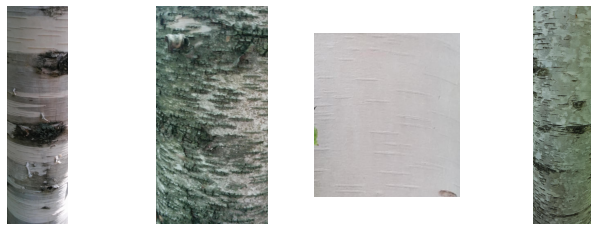

__________________________________________________________________________________________
HEG  Hêtre à grandes feuilles 
/tmp/lab_id_arbres/train/HEG/283_HEG_74_Nexus 5_20170906_103657_20.jpg
/tmp/lab_id_arbres/train/HEG/282_HEG_75_Nexus 5_20170906_103318_6.jpg
/tmp/lab_id_arbres/train/HEG/621_HEG_86_GalaxyS7_20170916_171622_13.jpg
/tmp/lab_id_arbres/train/HEG/800_HEG_70_GalaxyS5_20170713_111331_12.jpg


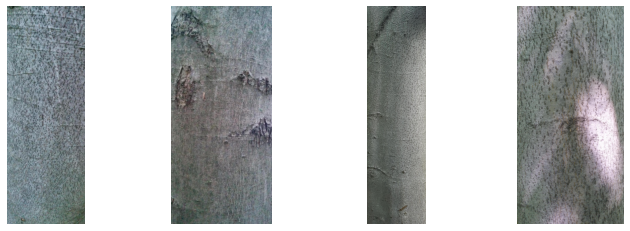

__________________________________________________________________________________________
FRA  Frêne d'Amérique 
/tmp/lab_id_arbres/train/FRA/11_FRA_173_Lumix_20170804_094023_2.jpg
/tmp/lab_id_arbres/train/FRA/253_FRA_54_Nexus 5_20170804_101623_2.jpg
/tmp/lab_id_arbres/train/FRA/10_FRA_109_Lumix_20170804_093907_6.jpg
/tmp/lab_id_arbres/train/FRA/245_FRA_94_Nexus 5_20170804_095304_2.jpg


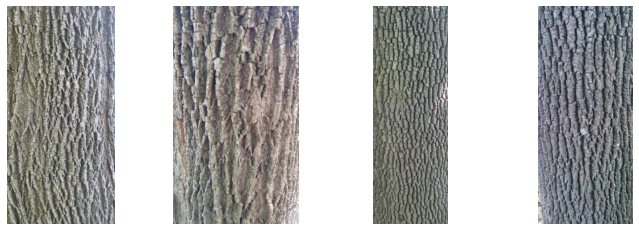

__________________________________________________________________________________________
MEL  Mélèze 
/tmp/lab_id_arbres/train/MEL/831_MEL_90_GalaxyS5_20170706_105420_24.jpg
/tmp/lab_id_arbres/train/MEL/839_MEL_70_GalaxyS5_20170706_110759_5.jpg
/tmp/lab_id_arbres/train/MEL/838_MEL_65_GalaxyS5_20170706_110605_20.jpg
/tmp/lab_id_arbres/train/MEL/848_MEL_99_GalaxyS5_20170706_112635_27.jpg


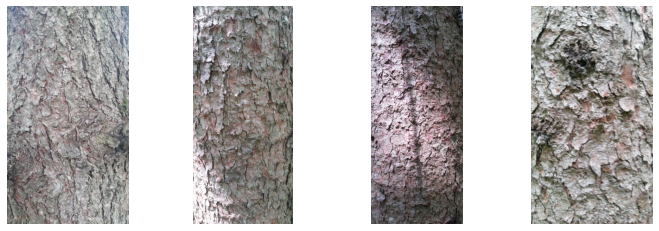

__________________________________________________________________________________________
OSV  Ostryer de Virginie 
/tmp/lab_id_arbres/train/OSV/890_OSV_190_GalaxyS5_20170713_105525_11.jpg
/tmp/lab_id_arbres/train/OSV/888_OSV_105_GalaxyS5_20170713_104958_38.jpg
/tmp/lab_id_arbres/train/OSV/312_OSV_46_Nexus 5_20170906_105146_3.jpg
/tmp/lab_id_arbres/train/OSV/887_OSV_44_GalaxyS5_20170713_104206_16.jpg


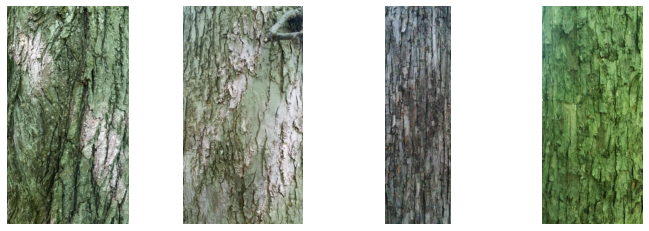

__________________________________________________________________________________________
EPO  Épinette de Norvège 
/tmp/lab_id_arbres/train/EPO/132_EPO_98_Nexus 5_20170921_152305_6.jpg
/tmp/lab_id_arbres/train/EPO/167_EPO_34_Nexus 5_20170922_102017_21.jpg
/tmp/lab_id_arbres/train/EPO/155_EPO_55_Nexus 5_20170922_095703_5.jpg
/tmp/lab_id_arbres/train/EPO/132_EPO_98_Nexus 5_20170921_152305_7.jpg


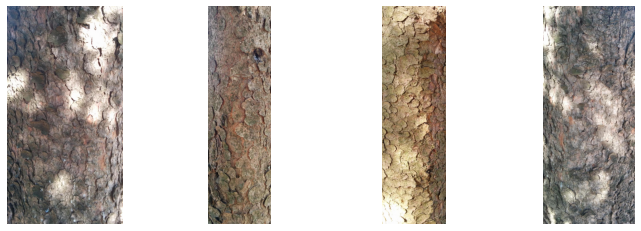

__________________________________________________________________________________________
EPB  Épinette blanche 
/tmp/lab_id_arbres/train/EPB/692_EPB_75_GalaxyS5_20170712_123338_9.jpg
/tmp/lab_id_arbres/train/EPB/85_EPB_104_Nexus 5_20170817_110447_14.jpg
/tmp/lab_id_arbres/train/EPB/689_EPB_67_GalaxyS5_20170712_122809_12.jpg
/tmp/lab_id_arbres/train/EPB/99_EPB_88_Nexus 5_20170817_112716_8.jpg


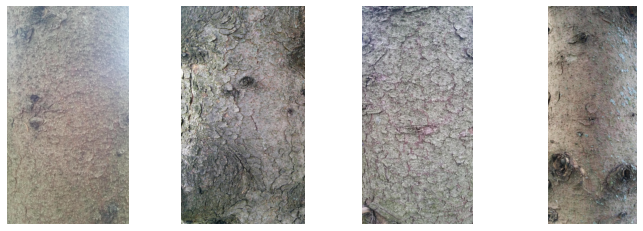

__________________________________________________________________________________________
EPN  Épinette noire 
/tmp/lab_id_arbres/train/EPN/697_EPN_110_GalaxyS5_20170622_100619_6.jpg
/tmp/lab_id_arbres/train/EPN/726_EPN_66_GalaxyS5_20170622_111759_15.jpg
/tmp/lab_id_arbres/train/EPN/737_EPN_78_GalaxyS5_20170622_115507_21.jpg
/tmp/lab_id_arbres/train/EPN/703_EPN_70_GalaxyS5_20170622_101740_18.jpg


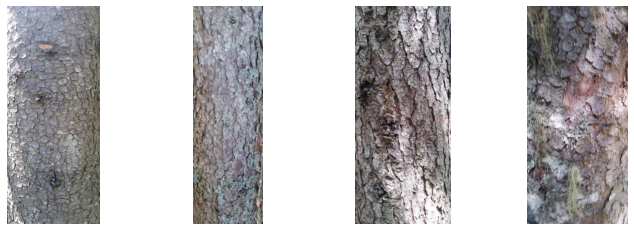

__________________________________________________________________________________________
EPR  Épinette rouge 
/tmp/lab_id_arbres/train/EPR/180_EPR_97_Nexus 5_20170608_102619_13.jpg
/tmp/lab_id_arbres/train/EPR/754_EPR_89_GalaxyS5_20170615_133508_25.jpg
/tmp/lab_id_arbres/train/EPR/538_EPR_101_GalaxyS5_20170607_153112_25.jpg
/tmp/lab_id_arbres/train/EPR/535_EPR_60_GalaxyS5_20170607_143651_44.jpg


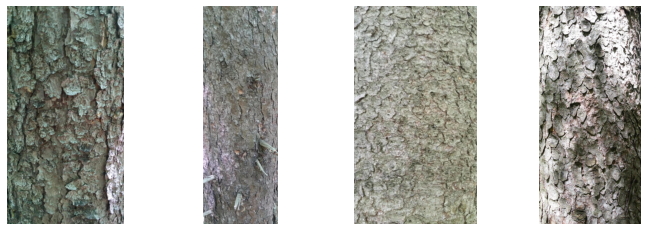

__________________________________________________________________________________________
PID  Pin rigide 
/tmp/lab_id_arbres/train/PID/345_PID_165_Nexus 5_20170817_100536_8.jpg
/tmp/lab_id_arbres/train/PID/348_PID_76_Nexus 5_20170817_103335_11.jpg
/tmp/lab_id_arbres/train/PID/348_PID_76_Nexus 5_20170817_103335_4.jpg
/tmp/lab_id_arbres/train/PID/346_PID_77_Nexus 5_20170817_103045_3.jpg


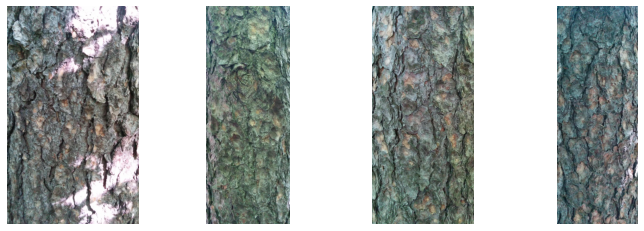

__________________________________________________________________________________________
PIR  Pin rouge 
/tmp/lab_id_arbres/train/PIR/362_PIR_97_Nexus 5_20170817_112057_15.jpg
/tmp/lab_id_arbres/train/PIR/349_PIR_112_Nexus 5_20170817_095640_14.jpg
/tmp/lab_id_arbres/train/PIR/632_PIR_92_GalaxyS5_20170607_143108_3.jpg
/tmp/lab_id_arbres/train/PIR/352_PIR_97_Nexus 5_20170817_100053_15.jpg


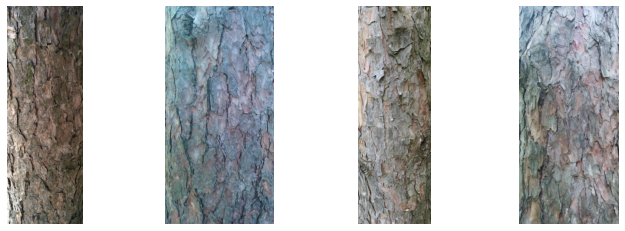

__________________________________________________________________________________________
PEG  Peuplier à grandes dents 
/tmp/lab_id_arbres/train/PEG/904_PEG_43_GalaxyS5_20170713_111959_12.jpg
/tmp/lab_id_arbres/train/PEG/906_PEG_55_GalaxyS5_20170713_112557_7.jpg
/tmp/lab_id_arbres/train/PEG/905_PEG_46_GalaxyS5_20170713_112124_20.jpg
/tmp/lab_id_arbres/train/PEG/905_PEG_46_GalaxyS5_20170713_112124_19.jpg


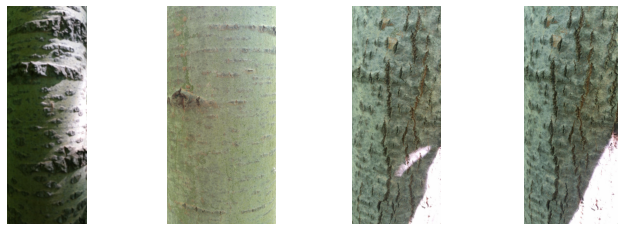

__________________________________________________________________________________________
PET  Peuplier faux tremble 
/tmp/lab_id_arbres/train/PET/922_PET_105_GalaxyS5_20170712_104635_14.jpg
/tmp/lab_id_arbres/train/PET/911_PET_110_GalaxyS5_20170712_102054_8.jpg
/tmp/lab_id_arbres/train/PET/959_PET_77_GalaxyS5_20170712_115352_3.jpg
/tmp/lab_id_arbres/train/PET/927_PET_109_GalaxyS5_20170712_105845_7.jpg


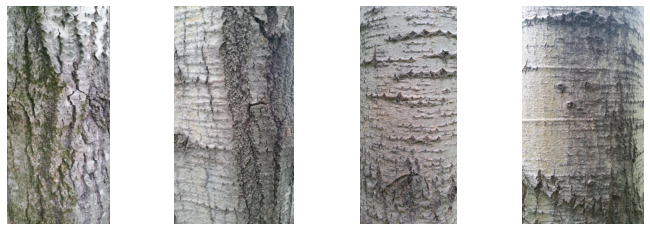

__________________________________________________________________________________________
CHR  Chêne rouge 
/tmp/lab_id_arbres/train/CHR/46_CHR_97_Nexus 5_20170608_095319_3.jpg
/tmp/lab_id_arbres/train/CHR/66_CHR_153_Nexus 5_20170906_100243_10.jpg
/tmp/lab_id_arbres/train/CHR/520_CHR_188_GalaxyS7_20170916_181952_14.jpg
/tmp/lab_id_arbres/train/CHR/477_CHR_152_GalaxyS7_20170916_142426_14.jpg


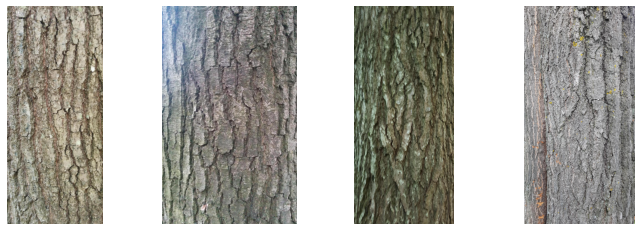

__________________________________________________________________________________________
THO  Thuya occidental 
/tmp/lab_id_arbres/train/THO/448_THO_70_Nexus 5_20170810_103405_2.jpg
/tmp/lab_id_arbres/train/THO/458_THO_155_Nexus 5_20170810_111252_4.jpg
/tmp/lab_id_arbres/train/THO/430_THO_74_Nexus 5_20170615_134333_18.jpg
/tmp/lab_id_arbres/train/THO/635_THO_77_GalaxyS5_20170607_141433_28.jpg


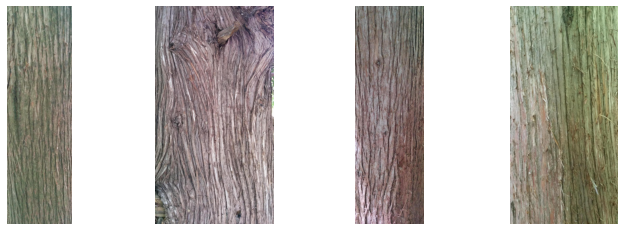

__________________________________________________________________________________________
PRU  Pruche du Canada 
/tmp/lab_id_arbres/train/PRU/976_PRU_121_GalaxyS5_20170713_110838_22.jpg
/tmp/lab_id_arbres/train/PRU/397_PRU_77_Nexus 5_20170906_091738_3.jpg
/tmp/lab_id_arbres/train/PRU/401_PRU_74_Nexus 5_20170906_092147_8.jpg
/tmp/lab_id_arbres/train/PRU/396_PRU_89_Nexus 5_20170906_091635_5.jpg


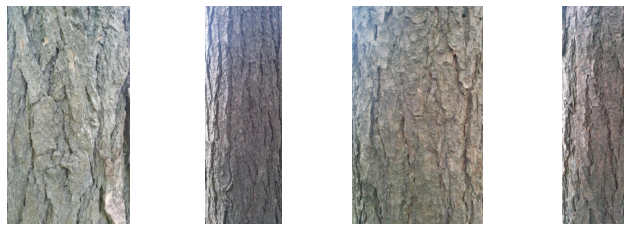

__________________________________________________________________________________________
ORA  Orme d'Amérique 
/tmp/lab_id_arbres/train/ORA/288_ORA_76_Nexus 5_20170810_104740_8.jpg
/tmp/lab_id_arbres/train/ORA/302_ORA_325_Nexus 5_20170810_124200_13.jpg
/tmp/lab_id_arbres/train/ORA/290_ORA_122_Nexus 5_20170810_105157_10.jpg
/tmp/lab_id_arbres/train/ORA/629_ORA_255_GalaxyS5_20170607_140656_8.jpg


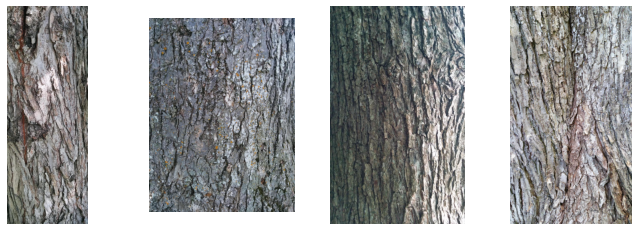

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 4

TRAINING_DIR = "/tmp/lab_id_arbres/train/"

for arbre_id in data_ecorces.keys():
    try:
        dir_path = os.path.join(TRAINING_DIR,arbre_id+os.sep)
        liste_fichiers = os.listdir(os.path.join(TRAINING_DIR,arbre_id+os.sep))
        next_two_pics = [os.path.join(dir_path, fname) for fname in liste_fichiers[0:pic_index]]
        fig = plt.figure(figsize=(12,4))
        print("_"*90)
        print(arbre_id,noms_arbres[data_ecorces[arbre_id]].split('-')[1])
        for i, img_path in enumerate(next_two_pics):
            print(img_path)
            img = mpimg.imread(img_path)
            plt.subplot(1,pic_index,i+1)
            plt.imshow(img)
            plt.axis('Off')
        plt.show()
    except:
        continue

### Création de flux de lots de données pour l'entraînement

In [110]:
TRAINING_DIR = "/tmp/lab_id_arbres/train/"
VALIDATION_DIR = "/tmp/lab_id_arbres/val"
TESTING_DIR = "/tmp/lab_id_arbres/test/"

BATCH_SIZE = 32
IMG_SIZE = (150, 150)

train_dataset = tf.keras.utils.image_dataset_from_directory(TRAINING_DIR,
                                                            validation_split=0.2,
                                                            subset='training',
                                                            seed=42,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(TRAINING_DIR,
                                                                 validation_split=0.2,
                                                                 subset='validation',
                                                                 seed=42,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

test_dataset = tf.keras.utils.image_dataset_from_directory(TESTING_DIR,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMG_SIZE)


Found 3655 files belonging to 22 classes.
Using 2924 files for training.
Found 3655 files belonging to 22 classes.
Using 731 files for validation.
Found 202 files belonging to 22 classes.


In [111]:
print('Number of training batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of training batches: 92
Number of validation batches: 23
Number of test batches: 7


In [112]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Normalisation des données

In [113]:
import numpy as np

# Create new data input
inputs = keras.Input(shape=(150, 150, 3))
#inputs = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`

# data_augmentation = keras.Sequential(
#     [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
# )
# inputs = data_augmentation(inputs)  # Apply random data augmentation

scale_layer = keras.layers.Rescaling(1.0/255)
normalized_train_dataset = train_dataset.map(lambda x, y: (scale_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_dataset))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.023529414 1.0


In [114]:
normalized_validation_dataset = validation_dataset.map(lambda x, y: (scale_layer(x), y))
image_batch, labels_batch = next(iter(normalized_validation_dataset))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.10725496 0.81188226


In [127]:
normalized_test_dataset = test_dataset.map(lambda x, y: (scale_layer(x), y))
image_batch, labels_batch = next(iter(normalized_test_dataset))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0077117602 1.0


# Création d'un modèle d'apprentissage par transfert

## Importation d'un modèle inception pré-entraîné

In [115]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-01-30 00:57:17--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   113MB/s    in 0.7s    

2022-01-30 00:57:18 (113 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [116]:
import os

import keras
print("Keras version:",keras.__version__)
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(weights='imagenet',  # Load weights pre-trained on ImageNet.
                                input_shape = (150, 150, 3), 
                                include_top = False)

pre_trained_model.summary()


Keras version: 2.7.0
TensorFlow version: 2.7.0
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_752 (Conv2D)            (None, 74, 74, 32)   864         ['input_16[0][0]']               
                                                                                                  
 batch_normalization_752 (Batch  (None, 74, 74, 32)  96          ['conv2d_752[0][0]']             
 Normalization)                                                                                   
                                        

In [132]:
## local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# pre_trained_model.load_weights(local_weights_file)

pre_trained_model.trainable = True

# Let's take a look to see how many layers are in the pretrained model
nbr_layers_pretrained_model = len(pre_trained_model.layers)
print("Nombre de couches dans le modèle pré-entraîné d'origine: ", nbr_layers_pretrained_model)

# How to get the layer index from the layer name
# https://www.thetopsites.net/article/50151157.shtml
layer_names = [layer.name for layer in pre_trained_model.layers]
last_layer_name = layer_names[-1]
print("Nom de la dernière couche du modèle pré-entraîné complet:",last_layer_name)
last_layer_index = layer_names.index(last_layer_name)
# Choix d'une nouvelle couche de sortie par essai / erreur
# last_layer_name = 'mixed5'
last_layer_name = 'mixed10'
print("Choix empirique de la dernière du modèle pré-entraîné:",last_layer_name)
last_layer_index = layer_names.index(last_layer_name)
print("Index de la dernière couche du modèle pré-entraîné:",last_layer_index)
# Choix de la dernière couche non-entraînable ou dernière couche « gelée »
# last_layer_frozen_name = 'mixed3'
last_layer_frozen_name = 'mixed10'
print("Choix empirique de la dernière couche non-entraînable:",last_layer_frozen_name)
last_layer_frozen_index = layer_names.index(last_layer_frozen_name)
print("Index de la dernière couche non-entraînable:",last_layer_frozen_index)
# Fine-tune from this layer onwards
fine_tune_at = last_layer_frozen_index
print("Nombre de couches non entraînables dans le modèle préentraîné: ", fine_tune_at )
# Freeze all the layers before the `fine_tune_at` layer
for layer in pre_trained_model.layers[:fine_tune_at]:
    layer.trainable =  False

print("Nombre de couches entraînables dans le modèle préentraîné: ", last_layer_index-fine_tune_at)
last_layer = pre_trained_model.get_layer(last_layer_name)
print('Dimensions de la dernière couche: ', last_layer.output_shape)
last_output = last_layer.output

Nombre de couches dans le modèle pré-entraîné d'origine:  311
Nom de la dernière couche du modèle pré-entraîné complet: mixed10
Choix empirique de la dernière du modèle pré-entraîné: mixed10
Index de la dernière couche du modèle pré-entraîné: 310
Choix empirique de la dernière couche non-entraînable: mixed10
Index de la dernière couche non-entraînable: 310
Nombre de couches non entraînables dans le modèle préentraîné:  310
Nombre de couches entraînables dans le modèle préentraîné:  0
Dimensions de la dernière couche:  (None, 3, 3, 2048)


In [133]:
# Flatten the output layer to 1 dimension
outputs = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
outputs = layers.Dense(1024, activation='relu')(outputs)
# Add a dropout rate of 0.5
outputs = layers.Dropout(0.5)(outputs)      
# # Add a bottleneck layer
# outputs = layers.Dense(512, activation='relu')(outputs)
# outputs = layers.Dropout(0.2)(outputs)  
# # Add a fully connected layer with 1,024 hidden units and ReLU activation
# outputs = layers.Dense(1024, activation='relu')(outputs)
# outputs = layers.Dropout(0.2)(outputs)  
# Add a final softmax layer for classification
# *** IMPORTANT *** 23 classes
number_of_target_class = 23
outputs = layers.Dense(number_of_target_class, activation='softmax')(outputs)           

transfer_model = Model(pre_trained_model.input, outputs) 
print("Number of layers in the learning transfer model: ", len(transfer_model.layers))


Number of layers in the learning transfer model:  315


In [134]:
transfer_model.summary()


Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_752 (Conv2D)            (None, 74, 74, 32)   864         ['input_16[0][0]']               
                                                                                                  
 batch_normalization_752 (Batch  (None, 74, 74, 32)  96          ['conv2d_752[0][0]']             
 Normalization)                                                                                   
                                                                                           

In [135]:
len(transfer_model.trainable_variables)


4

## Compilation du modèle

In [136]:
from tensorflow.keras.optimizers import RMSprop

# According to tf.keras.utils.image_dataset_from_directory documentation, 'int' is the default label_mode
# 'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss)
# So, by default, tf.keras.utils.image_dataset_from_directory will create a set of labels for the dataset 
# as integer that go from 1 to the number of classes in the dataset.
# In this case, the model should be compiled with a 'sparse_categorical_crossentropy' loss.
transfer_model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

print("Modèle compilé!")

Modèle compilé!


## Entraînement du modèle

In [137]:
initial_epochs = 10
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

# Callbacks are passed to the model via the callbacks argument in fit, 
# which takes a list of callbacks. You can pass any number of callbacks.
callbacks_list = [
    # # Interrupts training when improvement stops
    # keras.callbacks.EarlyStopping(
    #     # Monitors the model’s validation accuracy
    #     monitor='val_accuracy',
    #     # Interrupts training when accuracy has stopped 
    #     # improving for more than one epoch (that is, two epochs)
    #     patience=2,
    # ),
    keras.callbacks.ReduceLROnPlateau(
        # Monitors the model’s validation loss
        monitor='val_loss',
        # Divides the learning rate by 2 when triggered
        factor=0.5,
        # The callback is triggered after the validation loss 
        # has stopped improving for 1 epochs.
        patience=1,
    ) 
]
history_fine = transfer_model.fit(normalized_train_dataset,
                                  validation_data = normalized_validation_dataset,
                                  epochs = total_epochs,
                                  callbacks=callbacks_list,
                                  verbose = 2)


Epoch 1/20
92/92 - 11s - loss: 2.3288 - accuracy: 0.4275 - val_loss: 1.4155 - val_accuracy: 0.6047 - lr: 1.0000e-04 - 11s/epoch - 122ms/step
Epoch 2/20
92/92 - 4s - loss: 1.0379 - accuracy: 0.7120 - val_loss: 1.4535 - val_accuracy: 0.6019 - lr: 1.0000e-04 - 4s/epoch - 47ms/step
Epoch 3/20
92/92 - 4s - loss: 0.4779 - accuracy: 0.8536 - val_loss: 1.2531 - val_accuracy: 0.6676 - lr: 5.0000e-05 - 4s/epoch - 41ms/step
Epoch 4/20
92/92 - 4s - loss: 0.2917 - accuracy: 0.9145 - val_loss: 1.3150 - val_accuracy: 0.6717 - lr: 5.0000e-05 - 4s/epoch - 47ms/step
Epoch 5/20
92/92 - 4s - loss: 0.1704 - accuracy: 0.9579 - val_loss: 1.2411 - val_accuracy: 0.6854 - lr: 2.5000e-05 - 4s/epoch - 49ms/step
Epoch 6/20
92/92 - 4s - loss: 0.1139 - accuracy: 0.9740 - val_loss: 1.2685 - val_accuracy: 0.6854 - lr: 2.5000e-05 - 4s/epoch - 49ms/step
Epoch 7/20
92/92 - 4s - loss: 0.0800 - accuracy: 0.9832 - val_loss: 1.2666 - val_accuracy: 0.6895 - lr: 1.2500e-05 - 4s/epoch - 48ms/step
Epoch 8/20
92/92 - 4s - loss: 0

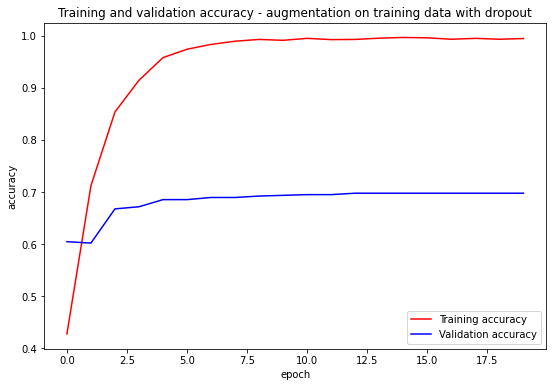

In [138]:
# dernière couche 'mixed10', dernière couche gelée 'mixed10'
# 20 epochs
# Test accuracy : 0.6633663177490234
import matplotlib.pyplot as plt
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation on training data with dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

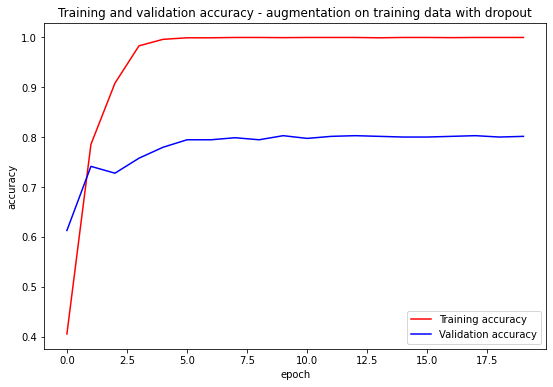

In [130]:
# dernière couche 'mixed5', dernière couche gelée 'mixed3'
# 20 epochs
# Test accuracy : 0.7425742745399475
import matplotlib.pyplot as plt
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation on training data with dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


In [139]:
loss, accuracy = transfer_model.evaluate(normalized_test_dataset)
print('Test accuracy :', accuracy)

7/7 [==============================] - 3s 50ms/step - loss: 1.3284 - accuracy: 0.6634
Test accuracy : 0.6633663177490234


In [ ]:
print("Fin de l'exécution du carnet IPython")